<H1> CHICAGO CRIME ANALYSIS </H1>
<HR>
<H2> MARANAN REILH RICH P. </H2>
<H3> BSIT-3A </H3>

In [73]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
chicago = pd.read_csv('chicago_crimes\\chicago_crimes.csv')

In [4]:
chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [5]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

In [15]:
chicago.describe()

,ID,Date,Beat,District,Ward,Year,Month,Day,Hour,DayOfWeek
count,2.491230e+05,249123,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000
mean,1.358652e+07,2024-09-29 02:28:42.947460352,1153.845634,11.308924,23.186823,2024.241668,6.536936,15.820001,12.521084,2.993971
min,2.807300e+04,2024-01-05 00:00:00,111.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,0.000000,0.000000
25%,1.352322e+07,2024-06-13 01:36:30,533.000000,5.000000,10.000000,2024.000000,4.000000,8.000000,8.000000,1.000000
50%,1.361560e+07,2024-09-16 11:19:00,1034.000000,10.000000,23.000000,2024.000000,7.000000,16.000000,13.000000,3.000000
75%,1.370865e+07,2024-12-28 18:20:00,1732.000000,17.000000,34.000000,2024.000000,9.000000,23.000000,18.000000,5.000000
max,1.381045e+07,2025-12-04 00:00:00,2535.000000,31.000000,50.000000,2025.000000,12.000000,31.000000,23.000000,6.000000
std,6.473192e+05,NaN,707.959752,7.074807,13.925951,0.428095,3.362766,8.707056,6.843107,1.998897


In [13]:
chicago.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
Month                     0
Day                       0
Hour                      0
DayOfWeek                 0
dtype: int64

In [14]:
chicago['Location Description'] = chicago['Location Description'].fillna('unaccounted_location_description')
chicago['Community Area'] = chicago['Community Area'].fillna('unaccounted_community_area')
chicago['X Coordinate'] = chicago['X Coordinate'].fillna('unaccounted')
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna('unaccounted')
chicago['Latitude'] = chicago['Latitude'].fillna('unaccounted')
chicago['Longitude'] = chicago['Longitude'].fillna('unaccounted')
chicago['Location'] = chicago['Location'].fillna('unaccounted_location')
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayOfWeek               0
dtype: int64

In [16]:
chicago['Case Number'] = chicago['Case Number'].astype('category')
chicago['Date'] = chicago['Date'].astype('category')
chicago['Block'] = chicago['Block'].astype('category')
chicago['IUCR'] = chicago['IUCR'].astype('category')
chicago['Primary Type'] = chicago['Primary Type'].astype('category')
chicago['Description'] = chicago['Description'].astype('category')
chicago['Location Description'] = chicago['Location Description'].astype('category')
chicago['Arrest'] = chicago['Arrest'].astype('category')
chicago['Domestic'] = chicago['Domestic'].astype('category')
chicago['Community Area'] = chicago['Community Area'].astype('category')
chicago['FBI Code'] = chicago['FBI Code'].astype('category')
chicago['X Coordinate'] = chicago['X Coordinate'].astype('category')
chicago['Y Coordinate'] = chicago['Y Coordinate'].astype('category')
chicago['Updated On'] = chicago['Updated On'].astype('category')
chicago['Latitude'] = chicago['Latitude'].astype('category')
chicago['Longitude'] = chicago['Longitude'].astype('category')
chicago['Location'] = chicago['Location'].astype('category')

In [17]:
chicago.dtypes

ID                         int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                  category
Domestic                category
Beat                       int64
District                   int64
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate            category
Y Coordinate            category
Year                       int32
Updated On              category
Latitude                category
Longitude               category
Location                category
Month                      int32
Day                        int32
Hour                       int32
DayOfWeek                  int32
dtype: object

In [18]:
chicago['Date'] = chicago['Date'].astype('str')
chicago['Date'] = chicago['Date'].str.strip()
chicago['Date'] = chicago['Date'].str.replace('/','-')

In [19]:
chicago['Date'] = pd.to_datetime(chicago['Date'],dayfirst=True,errors = 'coerce')

In [20]:
chicago['Year'] = chicago['Date'].dt.year
chicago['Month'] = chicago['Date'].dt.month
chicago['DayofWeek'] = chicago['Date'].dt.dayofweek
chicago['Day'] = chicago['Date'].dt.day
chicago['Hour'] = chicago['Date'].dt.hour

In [21]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayOfWeek               0
DayofWeek               0
dtype: int64

<h1> DATA VISUALIZATION WITH 35 INSIGHTS </h1> 
<hr> 

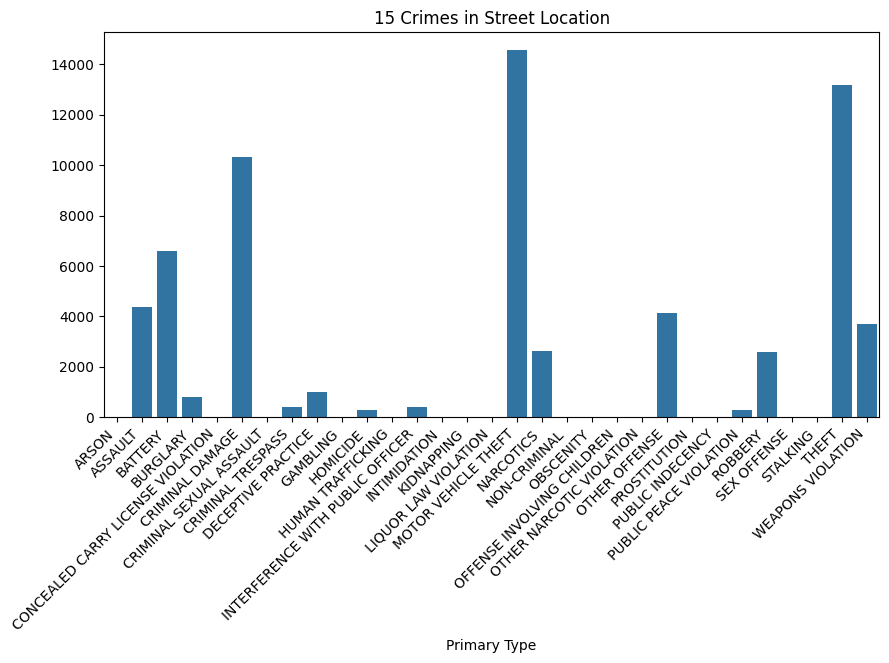

In [35]:
Strt = chicago[chicago['Location Description'] == 'STREET']
Pt = Strt['Primary Type'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=Pt.index, y=Pt.values)
plt.title("15 Crimes in Street Location")
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
Strt['Primary Type'].value_counts().head(10)

Primary Type
MOTOR VEHICLE THEFT    14550
THEFT                  13185
CRIMINAL DAMAGE        10334
BATTERY                 6578
ASSAULT                 4361
OTHER OFFENSE           4114
WEAPONS VIOLATION       3686
NARCOTICS               2607
ROBBERY                 2590
DECEPTIVE PRACTICE      1003
Name: count, dtype: int64

<h1> INSIGHT FOR 15 CRIMES IN STREET LOCATION </h1>

<h3> 1. there are 66,040 street records in total.  </h3>
<h3> 2. the top 3 street crimes (motor vehicle theft, theft, criminal damage) already make up 58% of all street cases. </h3>
<h3> 3. roughly 32% happen at night (10 PM–4 AM), while 35% happen during daytime (9 AM–5 PM).  </h3>
<h3> 4. weekends account for about 30% of street incidents so weekdays still carry most of the load. </h3>
<h3> 5. for the top category (motor vehicle theft), the arrest rate is low (2.5%)—these are hard to catch. </h3>

<hr>

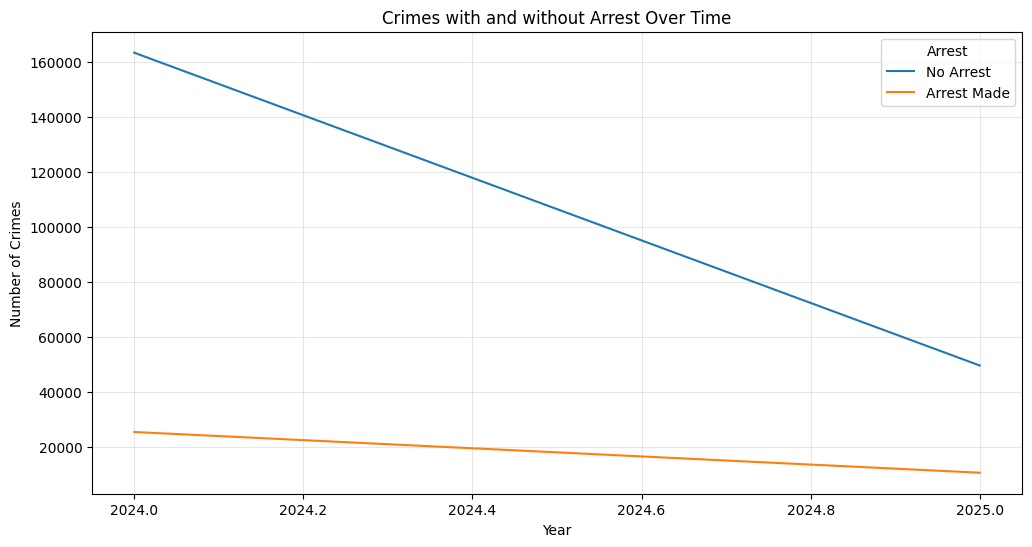

In [37]:
arrest_trends = chicago.groupby(['Year','Arrest']).size().unstack()
arrest_trends = arrest_trends.rename(columns={False: "No Arrest", True: "Arrest Made"})

arrest_trends.plot(kind='line', figsize=(12,6))
plt.title("Crimes with and without Arrest Over Time")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h1> INSIGHT FOR CRIME WITH ORO WITHOUT ARREST OVER TIME </h1>

<h3> 6. both crimes without arrest and crimes with arrest are going down from 2024 to 2025 in my data. </h3>
<h3> 7. the drop is much bigger on the “no arrest” line, which is good fewer cases ending without an arrest. </h3>

<HR>

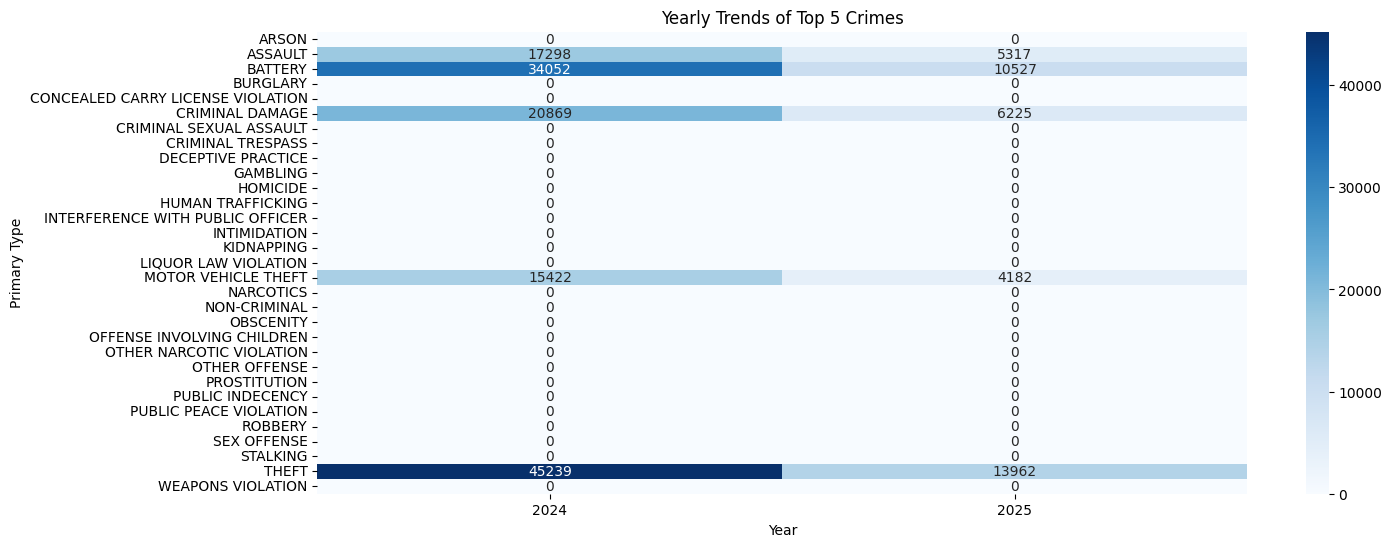

In [40]:
top5 = chicago['Primary Type'].value_counts().head(5).index
pivot2 = chicago[chicago['Primary Type'].isin(top5)].pivot_table(
    index='Primary Type', columns='Year', values='ID', aggfunc='count'
)
plt.figure(figsize=(15,6))
sns.heatmap(pivot2, cmap="Blues", annot=True, fmt="d")
plt.title("Yearly Trends of Top 5 Crimes")
plt.show()

<h1> INSIGHT FOR YEARLY TREND OF TOP 5 CRIMES </h1> 

<H3> 8. theft still dominates both years—it’s the biggest block of cases by far.  </H3>
<H3> 9. motor vehicle theft fell a lot into 2025 looks like fewer car cases recorded so far.  </H3>
<H3> 10. criminal damage and battery keep a steady share year to year no big swings there. </H3>

<HR>

<Figure size 1200x600 with 0 Axes>

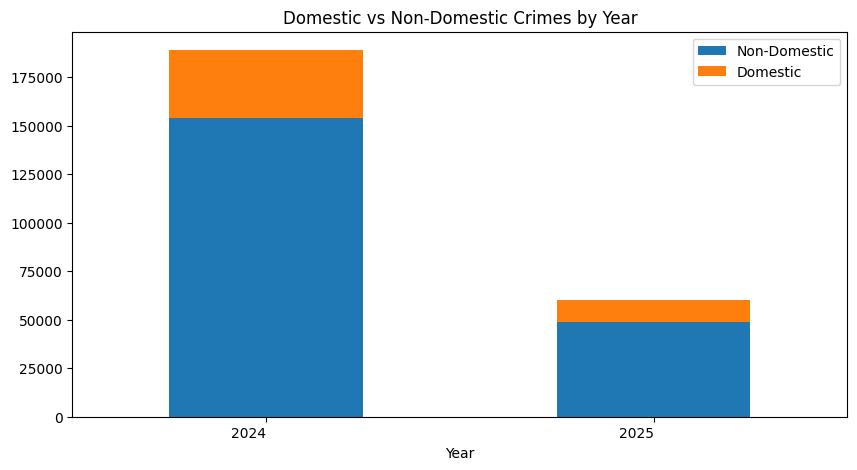

In [42]:
yearly_domestic = chicago.groupby(['Year', 'Domestic']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
yearly_domestic.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,5))

plt.title("Domestic vs Non-Domestic Crimes by Year")
plt.legend(["Non-Domestic", "Domestic"])
plt.xticks(rotation=0, ha='right')
plt.show()

<h1> INSIGHT FOR DOMESTIC VS NON-DOMESTIC CRIMES BY YEAR </h1>

<h3> 11. non-domestic cases dominate both years the big blue bar tells me most incidents happen outside domestic settings. </h3>
<h3> 12. both bars shrink in 2025, which likely means I’m looking at a partial year so far.</h3>
<h3> 13. the domestic slice stays small compared to non-domestic—only a small share of total cases. </h3>

<HR>

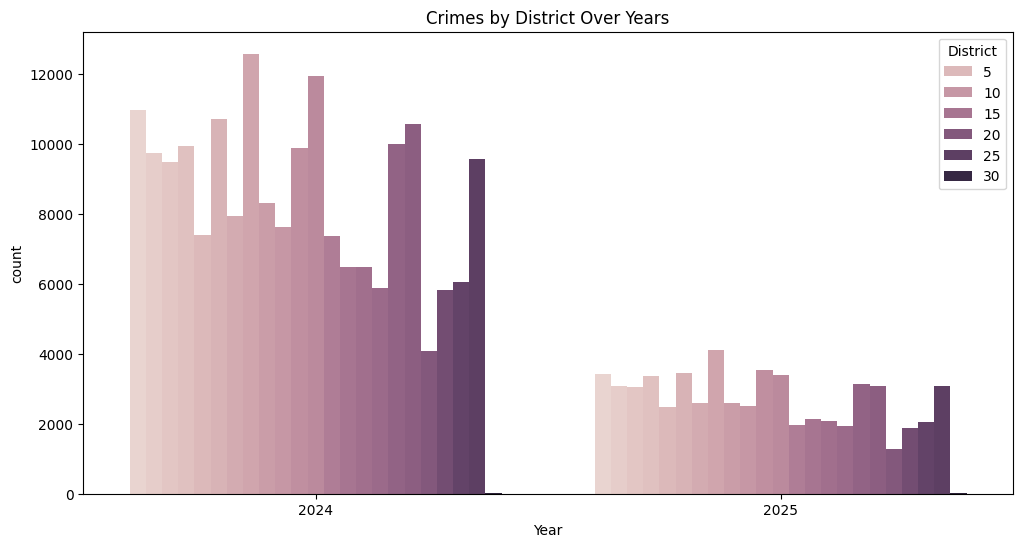

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', hue='District', data=chicago)
plt.title("Crimes by District Over Years")
plt.show()

<h1> INSIGHT FOR CRIMES BY DIRSTRICT OVER YEARS </h1> 

<h3> 14. the heaviest districts overall in my data are 8, 12, 1, 6, and 19 together they already make up 30% of all district cases. </h3>
<h3> 15. 2025 drops across the board, and the biggest absolute declines are in Districts 12, 8, 1, 19, and 6 (each down 6.7k–8.6k vs 2024). that looks like a mix of real decline and partial-year data. </h3>

<hr>

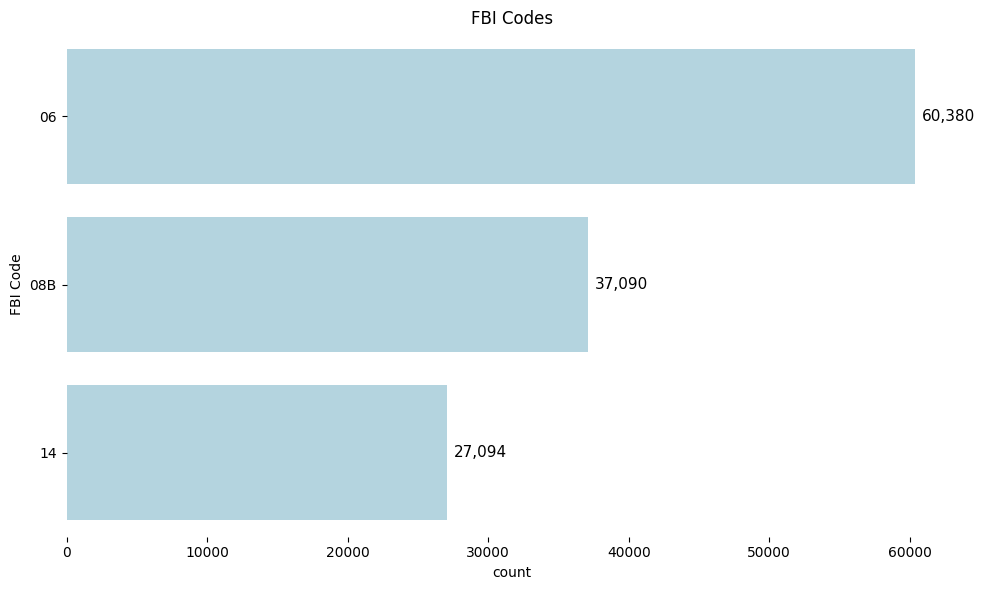

In [50]:
FBI_Crime_Codes = chicago['FBI Code'].value_counts().head(3).index

FBI_Code = chicago[chicago['FBI Code'].isin(FBI_Crime_Codes)]

plt.figure(figsize=(10, 6))
graph = sns.countplot(
    y='FBI Code',
    data=FBI_Code,
    order=FBI_Crime_Codes,
    color='lightblue'
)

# Add value labels on bars
for x in graph.patches:
    count = int(x.get_width())
    graph.text(
        count + 500,
        x.get_y() + x.get_height() / 2,
        f'{count:,}',
        va='center',
        fontsize=11
    )

plt.title("FBI Codes")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<h1> INSIGHT FOR FBI CODES </h1>

<h3> 16. Code 06 (60k) is the biggest chunk that’s the larceny/theft bucket. it’s almost half of the top three combined, so theft prevention should be a priority. </h3>
<h3> 17. Code 08B (37k) is simple assault lots of non-aggravated confrontations. that lines up with everyday street scuffles. </h3>
<h3> 18. Code 14 (27k) is criminal damage/vandalism steady property damage showing up in the data. </h3>

<hr> 

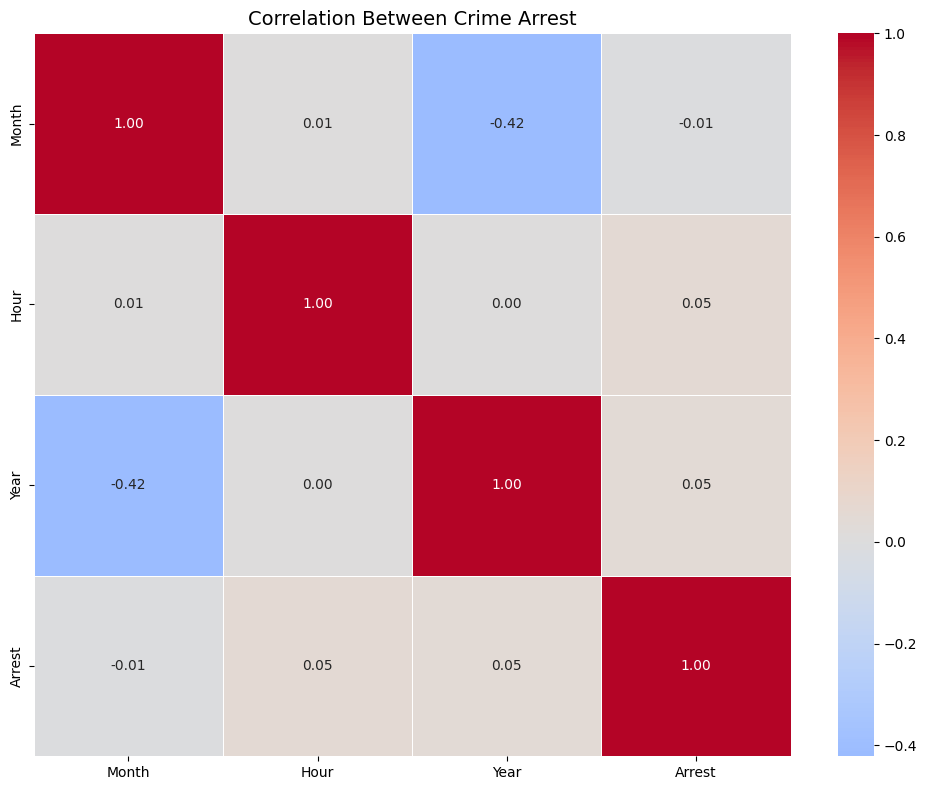

In [51]:
correlation_matrix = chicago[['Month', 'Hour', 'Year', 
                             'Arrest']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,       
    fmt=".2f",         
    cmap='coolwarm', 
    center=0,          
    linewidths=0.5
)

plt.title('Correlation Between Crime Arrest', fontsize=14)
plt.tight_layout()
plt.show()

<h1> INSIGHT FOR CORRELATION BETWEEN CRIME ARREST </h1>

<h3> 19. Month doesn’t drive arrests. the link between month and arrest is basically zero (−0.01), so arrests don’t really spike just because it’s a certain month. </h3>
<h3> 20. Hour is almost flat too. the hour vs arrest link is tiny (+0.05)—time of day isn’t a strong signal for whether an arrest happens.</h3>
<h3> 21. The month–year negative (−0.42) looks like a data artifact: 2025 is likely partial, so it contains fewer months, which pulls that correlation down. </h3>

<HR>

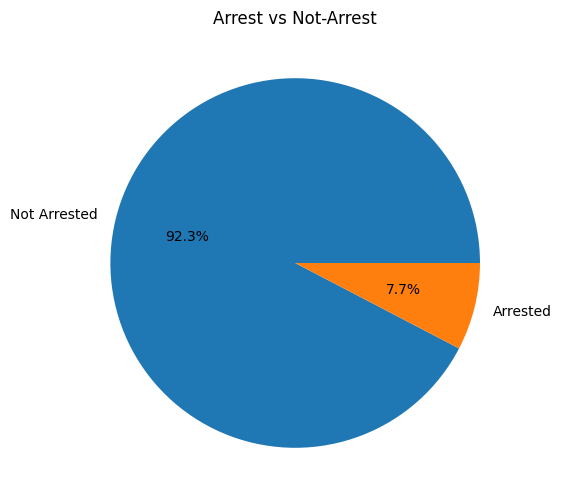

In [52]:
theft = chicago[chicago['Primary Type'] == 'THEFT']
theft_arrest_count = theft['Arrest'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    theft_arrest_count,
    labels=theft_arrest_count.index.map({False: "Not Arrested", True: "Arrested"}),
    autopct='%1.1f%%'
)
plt.title("Arrest vs Not-Arrest")
plt.show()

<h1> INSIGHT FOR ARREST VS NO ARREST PERCENTAGE </h1>

<h3> 22. Most thefts don’t end in arrest. about 7.7% are arrested and 92.3% aren’t roughly 1 out of 13 theft cases leads to an arrest.  </h3>
<h3> 23. Theft is harder to clear than average. its arrest rate is lower than my overall rate in the dataset, so it’s tougher to catch after the fact. </h3>

<hr>

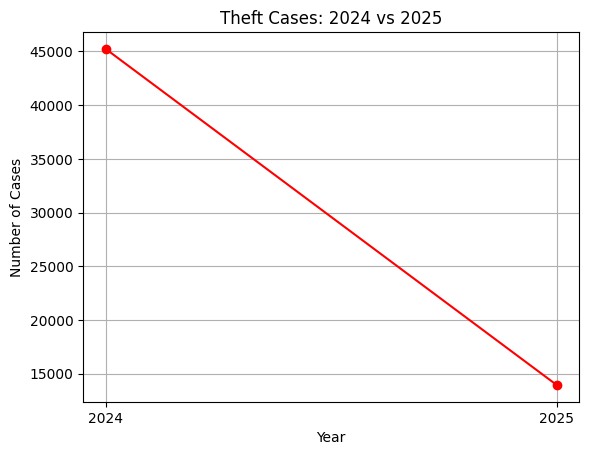

In [55]:
theft_counts = chicago[(chicago['Primary Type']=='THEFT') & (chicago['Year'].isin([2024,2025]))].groupby('Year').size()
plt.plot(theft_counts.index, theft_counts.values, marker='o', color='red')
plt.title('Theft Cases: 2024 vs 2025')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks([2024, 2025])
plt.grid(True)
plt.show()

<h1> INSIGHT FOR THEFT CASES IN YEAR 2024 VS 2025 </h1> 

<h3> 24. Counts: 2024 = 45,239 cases 2025 = 13,962 cases. </h3>
<h3> 25. There are 31,277 theft cases from 2024-2025.</h3>
<h3> 26. these are the percentage of 2024 and 2025 arrest rate, (theft only): 2024 = 6.85% 2025 = 10.26%. </h3>

<hr> 

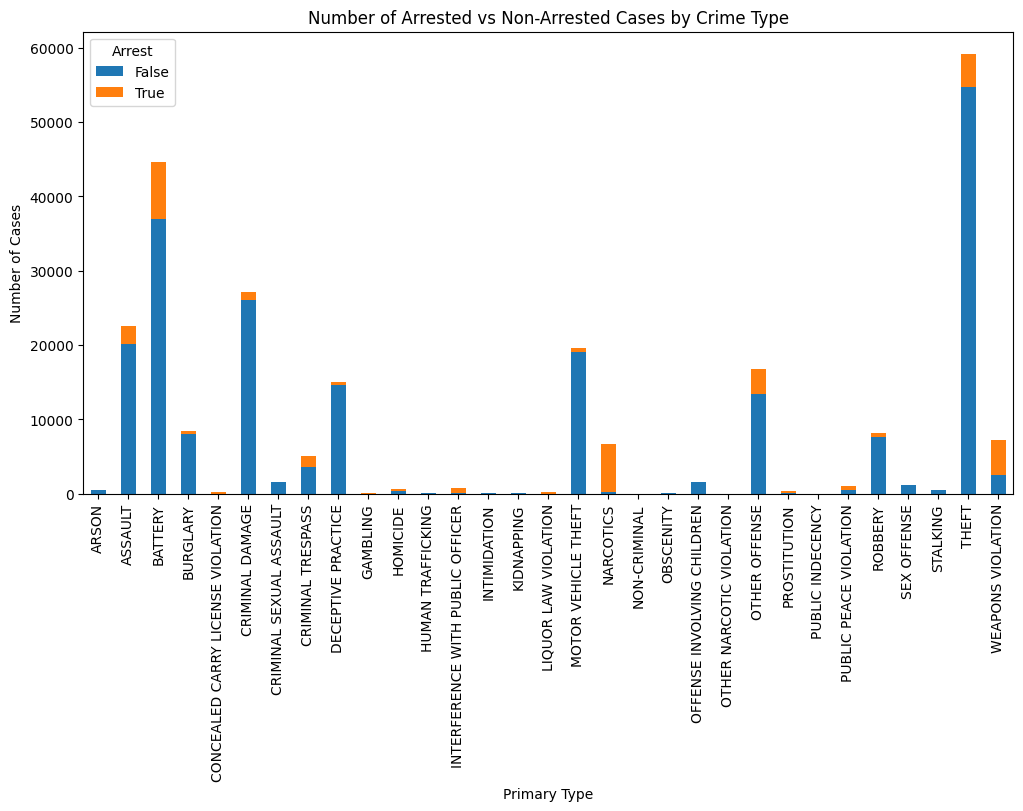

Arrest,False,True
Primary Type,,
ARSON,427,25
ASSAULT,20115,2500
BATTERY,36932,7647
BURGLARY,8027,416
CONCEALED CARRY LICENSE VIOLATION,3,246
CRIMINAL DAMAGE,25987,1107
CRIMINAL SEXUAL ASSAULT,1533,40
CRIMINAL TRESPASS,3569,1476
DECEPTIVE PRACTICE,14545,446


In [65]:
arrest_counts = chicago.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)

arrest_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Number of Arrested vs Non-Arrested Cases by Crime Type')
plt.ylabel('Number of Cases')
plt.xlabel('Primary Type')
plt.xticks(rotation=90)
plt.show()

arrest_counts

<h1> INSIGHT FOR NUMBER OF ARRESTED AND NON- ARRESTED CASES BY CRIME TYPE  </h1>

<h3> 27. theft and motor vehicle theft carry the biggest volumes, and most of those bars are no arrest. </h3>
<h3> 28. weapons violation and narcotics stand out with a larger arrested share than most categories, their orange segments are relatively big.  </h3>
<h3> 29. enforcement type categories like liquor law violation and prostitution show a higher arrest proportion than property crimes.</h3>

<HR>

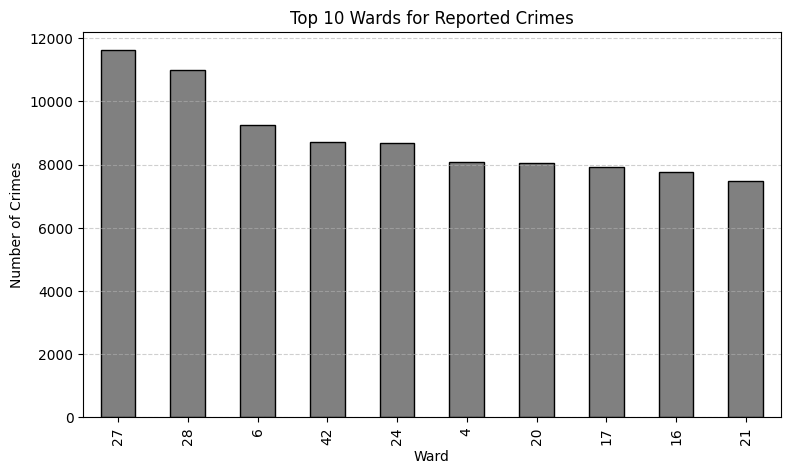

In [70]:
# Group by Ward
ward_counts = chicago.groupby('Ward')['ID'].count().sort_values(ascending=False).head(10)

# Plot Top 10 Wards
plt.figure(figsize=(9,5))
ward_counts.plot(kind='bar', color='gray', edgecolor='black')

plt.title('Top 10 Wards for Reported Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h1> INSIGHT FOR TOP 10 WARDS FOR REPORTED CRIMES </h1>

<h3> 30. Ward 27 has the most reports: 11,622. </h3>
<h3> 31. the next cluster is Wards 6/42/24 with 9,246 / 8,721 / 8,686. </h3>
<h3> 32. the gap from #1 to #10 is 4,142 cases (11,622-7,480).</h3>

<HR>

<Axes: xlabel='Description'>

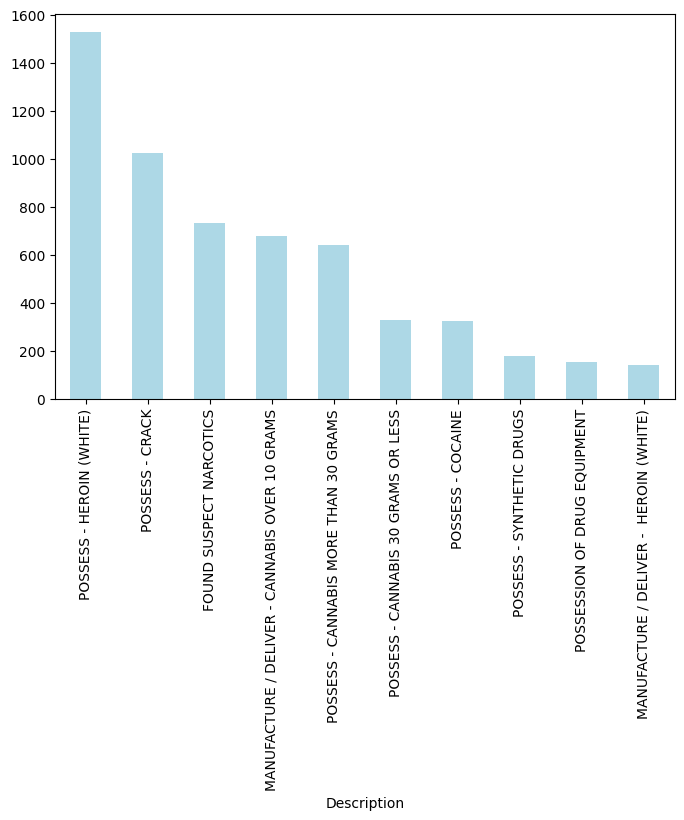

In [72]:
chicago[chicago['Primary Type'] == 'NARCOTICS']['Description'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='lightblue')

<H1> INSIGHT FOR COMMON DRUG-RELATED CRIME </H1> 

<H3> 33. the biggest slice is Possess Heroin White. this is the most common item in the narcotics list.</H3>
<H3> 34. several cannabis entries sit in the middle over 10 grams, more than 30 grams, and 30 grams or less. together, these make up a solid chunk of the chart.</H3>
<H3> 35. the smallest bars in the top ten are Possession of Drug Equipment and Manufacture/Deliver Heroin (White), which means they happen less often than the possession-based entries </H3>

<hr>